In [68]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import math
import time
from math import sqrt

In [2]:
# Fetching data

df = pd.read_csv('../data/dataset.csv')

<AxesSubplot:xlabel='Time'>

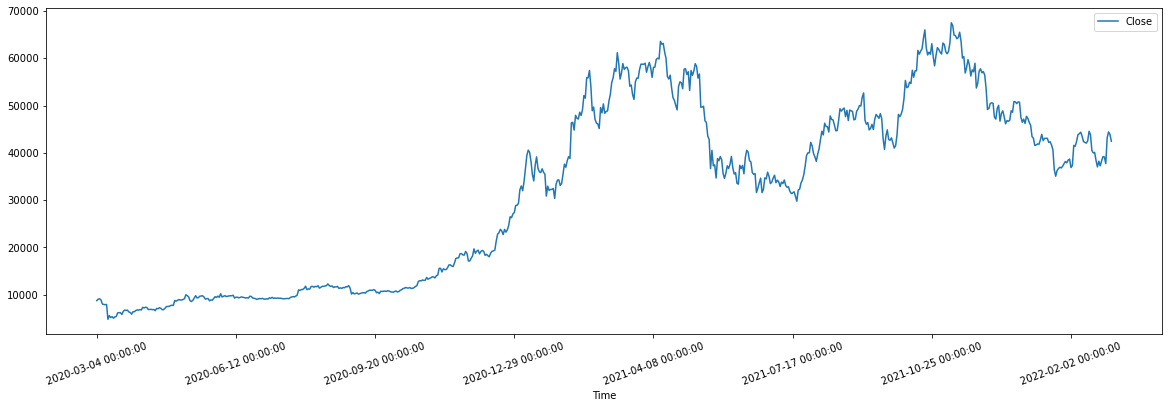

In [3]:
# Plotting btc prices
df.plot(x='Time', y='Close', kind='line', figsize=(20,6), rot=20)

In [4]:
# Extracting closing prices
FullData=df[['Close']].values
print(FullData[0:5])
 
# Choosing between Standardization or normalization
#sc = StandardScaler()
sc=MinMaxScaler()
 
DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
#X=FullData
 
print('### After Normalization ###')
X[0:5]

[[8750.7]
 [9056.9]
 [9134.3]
 [8889.9]
 [8036.5]]
### After Normalization ###


array([[0.06295669],
       [0.06783975],
       [0.06907407],
       [0.06517655],
       [0.05156714]])

In [13]:
test_size = 0.2                                                # proportion of dataset to be used as test set
cv_size = 0.2                                                   # proportion of dataset to be used as cross-validation set

In [17]:
num_cv = int(cv_size*len(X))
num_test = int(test_size*len(X))
num_train = len(X) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = X[:num_train]
cv = X[num_train:num_train+num_cv]
train_cv = X[:num_train+num_cv]
test = X[num_train+num_cv:]
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 438
num_cv = 146
num_test = 146
train.shape = (438, 1)
cv.shape = (146, 1)
train_cv.shape = (584, 1)
test.shape = (146, 1)


In [25]:
## FOR TRAINING
# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(train)
TimeSteps=5  # next day's Price Prediction is based on last how many past day's prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = train[i-TimeSteps:i]
    y_sample = train[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
################################################
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(433, 5, 1)

#### Output Data shape ####
(433, 1)


In [26]:
X_train = X_data
y_train = y_data

In [27]:
## FOR CV
# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(cv)
TimeSteps=5  # next day's Price Prediction is based on last how many past day's prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = cv[i-TimeSteps:i]
    y_sample = cv[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
################################################
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(141, 5, 1)

#### Output Data shape ####
(141, 1)


In [28]:
X_cv = X_data
y_cv = y_data

In [29]:
## FOR TRAIN_CV
# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(train_cv)
TimeSteps=5  # next day's Price Prediction is based on last how many past day's prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = train_cv[i-TimeSteps:i]
    y_sample = train_cv[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
################################################
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(579, 5, 1)

#### Output Data shape ####
(579, 1)


In [30]:
X_train_cv = X_data
y_train_cv = y_data

In [33]:
## FOR TEST
# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(test)
TimeSteps=5  # next day's Price Prediction is based on last how many past day's prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = test[i-TimeSteps:i]
    y_sample = test[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
################################################
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(141, 5, 1)

#### Output Data shape ####
(141, 1)


In [34]:
X_test = X_data
y_test = y_data

In [37]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 5
Number of Features: 1


In [80]:
def run(batchSize, numEpochs, X, Y, pred_set, actual_set):
    # Initialising the RNN
    regressor = Sequential()

    # Adding the First input hidden layer and the LSTM layer
    # return_sequences = True, means the output of every time step to be shared with hidden next layer
    regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

    # Adding the Second Second hidden layer and the LSTM layer
    regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

    # Adding the Second Third hidden layer and the LSTM layer
    regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


    # Adding the output layer
    regressor.add(Dense(units = 1))

    # Compiling the RNN
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

    ##################################################


    
    for r in range(3): # repeat 5 times

        # Fitting the RNN to the Training set
        regressor.fit(X, Y, batch_size = batchSize, epochs = numEpochs)
        error_score = list()
        predicted_Price = regressor.predict(pred_set)
        predicted_Price = DataScaler.inverse_transform(predicted_Price)

        orig=actual_set
        orig=DataScaler.inverse_transform(actual_set)

        rmse = sqrt(mean_squared_error(orig, predicted_Price))
        error_score.append(rmse)
        print('%d) Test RMSE: %.3f' % (r+1, rmse))
        # Calculate MAPE
        print("MAPE on train set = %0.3f%%" % get_mape(orig, predicted_Price))
    
    return error_score

In [66]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [76]:
# experiment
results = DataFrame()
# vary training batches
epochs = [25, 50, 100, 200]
for epoch in epochs:
    results[str(epoch)] = run(1, epoch, X_train, y_train, X_cv, y_cv)

Epoch 1/25
433/433 [==============================] - 3s 3ms/step - loss: 0.0675
Epoch 2/25
433/433 [==============================] - 1s 3ms/step - loss: 0.0072
Epoch 3/25
433/433 [==============================] - 1s 3ms/step - loss: 0.0048
Epoch 4/25
433/433 [==============================] - 1s 3ms/step - loss: 0.0038
Epoch 5/25
433/433 [==============================] - 1s 3ms/step - loss: 0.0021
Epoch 6/25
433/433 [==============================] - 1s 3ms/step - loss: 0.0019
Epoch 7/25
433/433 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 8/25
433/433 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 9/25
433/433 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 10/25
433/433 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 11/25
433/433 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 12/25
433/433 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 13/25
433/433 [====

433/433 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 25/50
433/433 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 26/50
433/433 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 27/50
433/433 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 28/50
433/433 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 29/50
433/433 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 30/50
433/433 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 31/50
433/433 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 32/50
433/433 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 33/50
433/433 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 34/50
433/433 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 35/50
433/433 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 36/50
433/433 [=======

Epoch 22/50
433/433 [==============================] - 1s 3ms/step - loss: 6.6304e-04
Epoch 23/50
433/433 [==============================] - 1s 3ms/step - loss: 7.9935e-04
Epoch 24/50
433/433 [==============================] - 1s 3ms/step - loss: 7.1189e-04
Epoch 25/50
433/433 [==============================] - 1s 3ms/step - loss: 7.0394e-04
Epoch 26/50
433/433 [==============================] - 1s 3ms/step - loss: 7.5915e-04
Epoch 27/50
433/433 [==============================] - 1s 3ms/step - loss: 8.0920e-04
Epoch 28/50
433/433 [==============================] - 1s 3ms/step - loss: 7.2177e-04
Epoch 29/50
433/433 [==============================] - 1s 3ms/step - loss: 8.3385e-04
Epoch 30/50
433/433 [==============================] - 1s 3ms/step - loss: 7.8969e-04
Epoch 31/50
433/433 [==============================] - 1s 3ms/step - loss: 7.0113e-04
Epoch 32/50
433/433 [==============================] - 1s 3ms/step - loss: 6.9228e-04
Epoch 33/50
433/433 [==============================] -

433/433 [==============================] - 1s 3ms/step - loss: 5.0828e-04
Epoch 61/100
433/433 [==============================] - 1s 3ms/step - loss: 5.3797e-04
Epoch 62/100
433/433 [==============================] - 1s 3ms/step - loss: 5.3464e-04
Epoch 63/100
433/433 [==============================] - 1s 3ms/step - loss: 4.7487e-04
Epoch 64/100
433/433 [==============================] - 1s 3ms/step - loss: 5.6396e-04
Epoch 65/100
433/433 [==============================] - 1s 3ms/step - loss: 4.7696e-04
Epoch 66/100
433/433 [==============================] - 1s 3ms/step - loss: 4.8977e-04
Epoch 67/100
433/433 [==============================] - 1s 3ms/step - loss: 5.3090e-04
Epoch 68/100
433/433 [==============================] - 1s 3ms/step - loss: 5.3483e-04
Epoch 69/100
433/433 [==============================] - 1s 3ms/step - loss: 4.6114e-04
Epoch 70/100
433/433 [==============================] - 1s 3ms/step - loss: 4.9698e-04
Epoch 71/100
433/433 [==============================] - 

433/433 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 50/200
433/433 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 51/200
433/433 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 52/200
433/433 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 53/200
433/433 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 54/200
433/433 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 55/200
433/433 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 56/200
433/433 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 57/200
433/433 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 58/200
433/433 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 59/200
433/433 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 60/200
433/433 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 61/200
433/

433/433 [==============================] - 1s 3ms/step - loss: 6.1350e-04
Epoch 38/200
433/433 [==============================] - 1s 3ms/step - loss: 5.2882e-04
Epoch 39/200
433/433 [==============================] - 1s 3ms/step - loss: 5.4260e-04
Epoch 40/200
433/433 [==============================] - 1s 3ms/step - loss: 5.3716e-04
Epoch 41/200
433/433 [==============================] - 1s 3ms/step - loss: 5.5927e-04
Epoch 42/200
433/433 [==============================] - 1s 3ms/step - loss: 5.1110e-04
Epoch 43/200
433/433 [==============================] - 1s 3ms/step - loss: 5.2909e-04
Epoch 44/200
433/433 [==============================] - 1s 3ms/step - loss: 5.7094e-04
Epoch 45/200
433/433 [==============================] - 1s 3ms/step - loss: 5.3032e-04
Epoch 46/200
433/433 [==============================] - 1s 3ms/step - loss: 4.9755e-04
Epoch 47/200
433/433 [==============================] - 1s 3ms/step - loss: 4.8221e-04
Epoch 48/200
433/433 [==============================] - 

Epoch 131/200
433/433 [==============================] - 1s 3ms/step - loss: 5.4306e-04
Epoch 132/200
433/433 [==============================] - 1s 3ms/step - loss: 5.1617e-04
Epoch 133/200
433/433 [==============================] - 1s 3ms/step - loss: 4.9812e-04
Epoch 134/200
433/433 [==============================] - 1s 3ms/step - loss: 5.2418e-04
Epoch 135/200
433/433 [==============================] - 1s 3ms/step - loss: 5.3416e-04
Epoch 136/200
433/433 [==============================] - 1s 3ms/step - loss: 5.0813e-04
Epoch 137/200
433/433 [==============================] - 1s 3ms/step - loss: 4.7873e-04
Epoch 138/200
433/433 [==============================] - 1s 3ms/step - loss: 4.8144e-04
Epoch 139/200
433/433 [==============================] - 1s 3ms/step - loss: 5.2598e-04
Epoch 140/200
433/433 [==============================] - 1s 3ms/step - loss: 4.8807e-04
Epoch 141/200
433/433 [==============================] - 1s 3ms/step - loss: 4.6422e-04
Epoch 142/200
433/433 [=========

433/433 [==============================] - 1s 3ms/step - loss: 4.5499e-04
Epoch 118/200
433/433 [==============================] - 1s 3ms/step - loss: 4.2559e-04
Epoch 119/200
433/433 [==============================] - 1s 3ms/step - loss: 4.7910e-04
Epoch 120/200
433/433 [==============================] - 1s 3ms/step - loss: 4.7655e-04
Epoch 121/200
433/433 [==============================] - 1s 3ms/step - loss: 4.6733e-04
Epoch 122/200
433/433 [==============================] - 1s 3ms/step - loss: 4.5148e-04
Epoch 123/200
433/433 [==============================] - 1s 3ms/step - loss: 4.5528e-04
Epoch 124/200
433/433 [==============================] - 1s 3ms/step - loss: 4.5928e-04
Epoch 125/200
433/433 [==============================] - 1s 3ms/step - loss: 4.7486e-04
Epoch 126/200
433/433 [==============================] - 1s 3ms/step - loss: 4.5173e-04
Epoch 127/200
433/433 [==============================] - 1s 3ms/step - loss: 4.6653e-04
Epoch 128/200
433/433 [=======================

In [77]:
# summarize results
print(results.describe())

                25           50          100         200
count     1.000000     1.000000     1.000000     1.00000
mean   2381.994382  1904.842203  2389.107696  2189.20733
std            NaN          NaN          NaN         NaN
min    2381.994382  1904.842203  2389.107696  2189.20733
25%    2381.994382  1904.842203  2389.107696  2189.20733
50%    2381.994382  1904.842203  2389.107696  2189.20733
75%    2381.994382  1904.842203  2389.107696  2189.20733
max    2381.994382  1904.842203  2389.107696  2189.20733


In [81]:
# experiment
results = DataFrame()
# vary training batches
batchSizes = [1, 2, 3, 4, 5]
for batchSize in batchSizes:
    results[str(batchSize)] = run(batchSize, 100, X_train, y_train, X_cv, y_cv)

Epoch 1/100
433/433 [==============================] - 3s 3ms/step - loss: 0.0424
Epoch 2/100
433/433 [==============================] - 1s 3ms/step - loss: 0.0050
Epoch 3/100
433/433 [==============================] - 1s 3ms/step - loss: 0.0030
Epoch 4/100
433/433 [==============================] - 1s 3ms/step - loss: 0.0019
Epoch 5/100
433/433 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 6/100
433/433 [==============================] - 1s 3ms/step - loss: 0.0020
Epoch 7/100
433/433 [==============================] - 2s 4ms/step - loss: 0.0016
Epoch 8/100
433/433 [==============================] - 2s 4ms/step - loss: 0.0018
Epoch 9/100
433/433 [==============================] - 2s 4ms/step - loss: 0.0016
Epoch 10/100
433/433 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 11/100
433/433 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 12/100
433/433 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 13/100


433/433 [==============================] - 1s 3ms/step - loss: 4.9130e-04
Epoch 92/100
433/433 [==============================] - 1s 3ms/step - loss: 4.7661e-04
Epoch 93/100
433/433 [==============================] - 1s 3ms/step - loss: 5.1329e-04
Epoch 94/100
433/433 [==============================] - 1s 3ms/step - loss: 6.3635e-04
Epoch 95/100
433/433 [==============================] - 1s 3ms/step - loss: 4.7555e-04
Epoch 96/100
433/433 [==============================] - 1s 3ms/step - loss: 4.9019e-04
Epoch 97/100
433/433 [==============================] - 1s 3ms/step - loss: 4.7099e-04
Epoch 98/100
433/433 [==============================] - 1s 3ms/step - loss: 4.9564e-04
Epoch 99/100
433/433 [==============================] - 1s 3ms/step - loss: 4.6999e-04
Epoch 100/100
433/433 [==============================] - 1s 3ms/step - loss: 5.4578e-04
2) Test RMSE: 1816.850
MAPE on train set = 3.562%
Epoch 1/100
433/433 [==============================] - 1s 3ms/step - loss: 4.6607e-04
Epoch 

217/217 [==============================] - 1s 5ms/step - loss: 6.8739e-04
Epoch 80/100
217/217 [==============================] - 1s 5ms/step - loss: 6.1340e-04
Epoch 81/100
217/217 [==============================] - 1s 5ms/step - loss: 6.1205e-04
Epoch 82/100
217/217 [==============================] - 1s 5ms/step - loss: 6.0524e-04
Epoch 83/100
217/217 [==============================] - 1s 5ms/step - loss: 5.7716e-04
Epoch 84/100
217/217 [==============================] - 1s 5ms/step - loss: 7.8431e-04
Epoch 85/100
217/217 [==============================] - 1s 5ms/step - loss: 6.7042e-04
Epoch 86/100
217/217 [==============================] - 1s 5ms/step - loss: 6.5191e-04
Epoch 87/100
217/217 [==============================] - 1s 5ms/step - loss: 6.0674e-04
Epoch 88/100
217/217 [==============================] - 1s 5ms/step - loss: 6.5529e-04
Epoch 89/100
217/217 [==============================] - 1s 5ms/step - loss: 5.7534e-04
Epoch 90/100
217/217 [==============================] - 

217/217 [==============================] - 1s 5ms/step - loss: 4.3538e-04
Epoch 66/100
217/217 [==============================] - 1s 5ms/step - loss: 5.1888e-04
Epoch 67/100
217/217 [==============================] - 1s 5ms/step - loss: 4.9666e-04
Epoch 68/100
217/217 [==============================] - 1s 5ms/step - loss: 4.5978e-04
Epoch 69/100
217/217 [==============================] - 1s 5ms/step - loss: 5.1876e-04
Epoch 70/100
217/217 [==============================] - 1s 5ms/step - loss: 4.5155e-04
Epoch 71/100
217/217 [==============================] - 1s 5ms/step - loss: 4.4436e-04
Epoch 72/100
217/217 [==============================] - 1s 5ms/step - loss: 5.1682e-04
Epoch 73/100
217/217 [==============================] - 1s 5ms/step - loss: 4.6923e-04
Epoch 74/100
217/217 [==============================] - 1s 5ms/step - loss: 4.6272e-04
Epoch 75/100
217/217 [==============================] - 1s 5ms/step - loss: 4.9711e-04
Epoch 76/100
217/217 [==============================] - 

145/145 [==============================] - 1s 4ms/step - loss: 6.4840e-04
Epoch 54/100
145/145 [==============================] - 1s 4ms/step - loss: 6.2572e-04
Epoch 55/100
145/145 [==============================] - 1s 4ms/step - loss: 5.7039e-04
Epoch 56/100
145/145 [==============================] - 1s 5ms/step - loss: 5.7827e-04
Epoch 57/100
145/145 [==============================] - 1s 5ms/step - loss: 6.5980e-04
Epoch 58/100
145/145 [==============================] - 1s 5ms/step - loss: 5.7647e-04
Epoch 59/100
145/145 [==============================] - 1s 4ms/step - loss: 6.6496e-04
Epoch 60/100
145/145 [==============================] - 1s 4ms/step - loss: 7.2962e-04
Epoch 61/100
145/145 [==============================] - 1s 4ms/step - loss: 6.5179e-04
Epoch 62/100
145/145 [==============================] - 1s 5ms/step - loss: 5.6160e-04
Epoch 63/100
145/145 [==============================] - 1s 5ms/step - loss: 6.0728e-04
Epoch 64/100
145/145 [==============================] - 

109/109 [==============================] - 0s 5ms/step - loss: 7.0160e-04
Epoch 41/100
109/109 [==============================] - 1s 5ms/step - loss: 7.5042e-04
Epoch 42/100
109/109 [==============================] - 1s 5ms/step - loss: 7.3459e-04
Epoch 43/100
109/109 [==============================] - 0s 5ms/step - loss: 7.7152e-04
Epoch 44/100
109/109 [==============================] - 1s 5ms/step - loss: 6.6120e-04
Epoch 45/100
109/109 [==============================] - 1s 5ms/step - loss: 6.6523e-04
Epoch 46/100
109/109 [==============================] - 1s 5ms/step - loss: 7.0992e-04
Epoch 47/100
109/109 [==============================] - 1s 5ms/step - loss: 6.7496e-04
Epoch 48/100
109/109 [==============================] - 1s 5ms/step - loss: 6.4477e-04
Epoch 49/100
109/109 [==============================] - 1s 5ms/step - loss: 7.7001e-04
Epoch 50/100
109/109 [==============================] - 1s 5ms/step - loss: 6.3206e-04
Epoch 51/100
109/109 [==============================] - 

109/109 [==============================] - 0s 4ms/step - loss: 4.9355e-04
Epoch 27/100
109/109 [==============================] - 1s 5ms/step - loss: 5.7981e-04
Epoch 28/100
109/109 [==============================] - 1s 5ms/step - loss: 5.0660e-04
Epoch 29/100
109/109 [==============================] - 0s 4ms/step - loss: 5.4385e-04
Epoch 30/100
109/109 [==============================] - 1s 5ms/step - loss: 4.5463e-04
Epoch 31/100
109/109 [==============================] - 0s 5ms/step - loss: 5.6979e-04
Epoch 32/100
109/109 [==============================] - 0s 4ms/step - loss: 5.1786e-04
Epoch 33/100
109/109 [==============================] - 0s 4ms/step - loss: 4.7659e-04
Epoch 34/100
109/109 [==============================] - 1s 5ms/step - loss: 4.8570e-04
Epoch 35/100
109/109 [==============================] - 1s 5ms/step - loss: 4.9883e-04
Epoch 36/100
109/109 [==============================] - 0s 4ms/step - loss: 6.8719e-04
Epoch 37/100
109/109 [==============================] - 

87/87 [==============================] - 0s 4ms/step - loss: 7.7407e-04
Epoch 19/100
87/87 [==============================] - 0s 4ms/step - loss: 6.4621e-04
Epoch 20/100
87/87 [==============================] - 0s 4ms/step - loss: 6.1145e-04
Epoch 21/100
87/87 [==============================] - 0s 4ms/step - loss: 5.6797e-04
Epoch 22/100
87/87 [==============================] - 0s 4ms/step - loss: 6.6646e-04
Epoch 23/100
87/87 [==============================] - 0s 4ms/step - loss: 6.2426e-04
Epoch 24/100
87/87 [==============================] - 0s 4ms/step - loss: 8.5128e-04
Epoch 25/100
87/87 [==============================] - 0s 4ms/step - loss: 7.1908e-04
Epoch 26/100
87/87 [==============================] - 0s 4ms/step - loss: 7.1226e-04
Epoch 27/100
87/87 [==============================] - 0s 4ms/step - loss: 6.2638e-04
Epoch 28/100
87/87 [==============================] - 0s 4ms/step - loss: 6.1014e-04
Epoch 29/100
87/87 [==============================] - 0s 5ms/step - loss: 5.93

87/87 [==============================] - 0s 4ms/step - loss: 5.7278e-04
Epoch 15/100
87/87 [==============================] - 0s 4ms/step - loss: 5.9395e-04
Epoch 16/100
87/87 [==============================] - 0s 4ms/step - loss: 5.7487e-04
Epoch 17/100
87/87 [==============================] - 0s 4ms/step - loss: 5.7938e-04
Epoch 18/100
87/87 [==============================] - 0s 4ms/step - loss: 5.3280e-04
Epoch 19/100
87/87 [==============================] - 0s 4ms/step - loss: 6.5584e-04
Epoch 20/100
87/87 [==============================] - 0s 4ms/step - loss: 5.2385e-04
Epoch 21/100
87/87 [==============================] - 0s 5ms/step - loss: 6.0104e-04
Epoch 22/100
87/87 [==============================] - 0s 4ms/step - loss: 5.9202e-04
Epoch 23/100
87/87 [==============================] - 0s 4ms/step - loss: 5.5324e-04
Epoch 24/100
87/87 [==============================] - 0s 4ms/step - loss: 6.3177e-04
Epoch 25/100
87/87 [==============================] - 0s 4ms/step - loss: 6.33

In [82]:
print(results.describe())

                 1            2           3            4            5
count     1.000000     1.000000     1.00000     1.000000     1.000000
mean   2404.352482  1759.037837  1917.97276  2084.571323  1970.591357
std            NaN          NaN         NaN          NaN          NaN
min    2404.352482  1759.037837  1917.97276  2084.571323  1970.591357
25%    2404.352482  1759.037837  1917.97276  2084.571323  1970.591357
50%    2404.352482  1759.037837  1917.97276  2084.571323  1970.591357
75%    2404.352482  1759.037837  1917.97276  2084.571323  1970.591357
max    2404.352482  1759.037837  1917.97276  2084.571323  1970.591357


In [87]:
# Initialising the RNN
regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Second Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Second Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train_cv, y_train_cv, batch_size = 1, epochs = 100)

predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)

orig=y_test
orig=DataScaler.inverse_transform(y_test)

rmse = sqrt(mean_squared_error(orig, predicted_Price))
print("RMSE on test set = %0.3f" % rmse)
print("MAPE on train set = %0.3f%%" % get_mape(orig, predicted_Price))

Epoch 1/100
579/579 [==============================] - 5s 3ms/step - loss: 0.0296
Epoch 2/100
579/579 [==============================] - 2s 3ms/step - loss: 0.0022
Epoch 3/100
579/579 [==============================] - 2s 3ms/step - loss: 0.0020
Epoch 4/100
579/579 [==============================] - 2s 3ms/step - loss: 0.0021
Epoch 5/100
579/579 [==============================] - 2s 3ms/step - loss: 0.0020
Epoch 6/100
579/579 [==============================] - 2s 3ms/step - loss: 0.0018
Epoch 7/100
579/579 [==============================] - 2s 3ms/step - loss: 0.0018
Epoch 8/100
579/579 [==============================] - 2s 3ms/step - loss: 0.0019
Epoch 9/100
579/579 [==============================] - 2s 3ms/step - loss: 0.0020
Epoch 10/100
579/579 [==============================] - 2s 3ms/step - loss: 0.0018
Epoch 11/100
579/579 [==============================] - 2s 3ms/step - loss: 0.0021
Epoch 12/100
579/579 [==============================] - 3s 4ms/step - loss: 0.0018
Epoch 13/100


579/579 [==============================] - 2s 3ms/step - loss: 6.2338e-04
Epoch 98/100
579/579 [==============================] - 2s 3ms/step - loss: 7.0286e-04
Epoch 99/100
579/579 [==============================] - 2s 3ms/step - loss: 7.0386e-04
Epoch 100/100
579/579 [==============================] - 2s 3ms/step - loss: 6.6145e-04
RMSE on test set = 1795.712
MAPE on train set = 2.683%


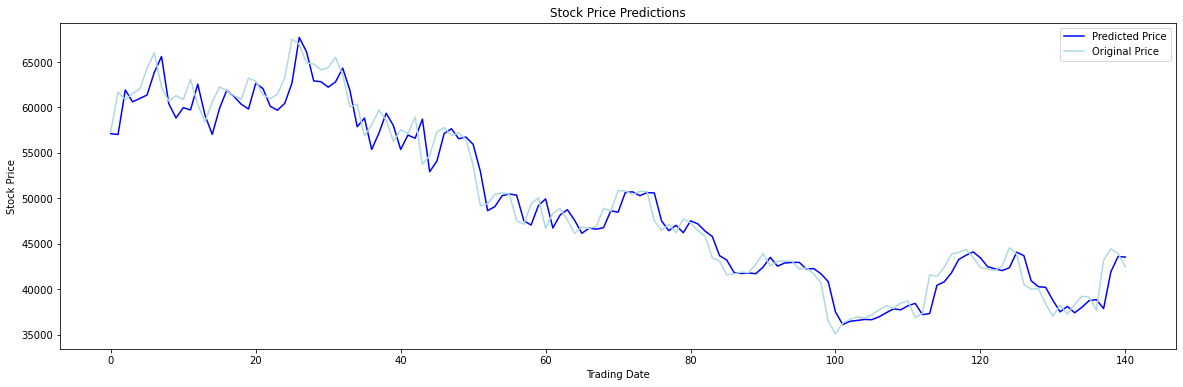

In [88]:
plt.plot(predicted_Price, color = 'blue', label = 'Predicted Price')
plt.plot(orig, color = 'lightblue', label = 'Original Price')
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
#plt.xticks(range(141), df.tail(141)['Time'])
plt.xticks(np.arange(0, 160, step=20))  
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()